## Group Members:
# Zobia Khan (CS-19063)
# Muqadas Ashraf (CS-19053)


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

In [2]:
# Reading dataset
dataset=pd.read_csv("The_Grades_Dataset.csv")
dataset.describe()
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [3]:
# Saving target feature in output variable
output=dataset.CGPA
output.head()

0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
Name: CGPA, dtype: float64

In [4]:
# Droping those features which perform no role in target computation
courses=dataset.drop(['CGPA','Seat No.'],axis="columns")
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PH-121     571 non-null    object
 1   HS-101     571 non-null    object
 2   CY-105     570 non-null    object
 3   HS-105/12  570 non-null    object
 4   MT-111     569 non-null    object
 5   CS-105     571 non-null    object
 6   CS-106     569 non-null    object
 7   EL-102     569 non-null    object
 8   EE-119     569 non-null    object
 9   ME-107     569 non-null    object
 10  CS-107     569 non-null    object
 11  HS-205/20  566 non-null    object
 12  MT-222     566 non-null    object
 13  EE-222     564 non-null    object
 14  MT-224     564 non-null    object
 15  CS-210     564 non-null    object
 16  CS-211     566 non-null    object
 17  CS-203     566 non-null    object
 18  CS-214     565 non-null    object
 19  EE-217     565 non-null    object
 20  CS-212     565 non-null    objec

In [5]:
AssignGPs={
    "A+": 4.0,
    "A": 4.0,
    "A-" : 3.7,
    "B+" : 3.4,
    "B" : 3.0,
    "B-" : 2.7,
    "C+" : 2.4,
    "C" : 2.0,
    "C-" : 1.7,
    "D+" : 1.4,
    "D" : 1.0,
    "F" : 0.0,
    "WU" :0
}

In [6]:
# Making string values integer by assigning GPs to grades
for i in courses:
    courses[i]=courses[i].map(AssignGPs)
courses.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,2.0,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.7,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.7,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,3.7,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0


In [7]:
# Checking null values
courses.columns[courses.isna().any()]

Index(['CY-105', 'HS-105/12', 'MT-111', 'CS-106', 'EL-102', 'EE-119', 'ME-107',
       'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211',
       'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303',
       'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318',
       'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414',
       'CS-419', 'CS-423', 'CS-412'],
      dtype='object')

In [8]:
# Filling 0 to null values
courses[0:]=courses[0:].fillna(0)

In [9]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    float64
 1   HS-101     571 non-null    float64
 2   CY-105     571 non-null    float64
 3   HS-105/12  571 non-null    float64
 4   MT-111     571 non-null    float64
 5   CS-105     571 non-null    float64
 6   CS-106     571 non-null    float64
 7   EL-102     571 non-null    float64
 8   EE-119     571 non-null    float64
 9   ME-107     571 non-null    float64
 10  CS-107     571 non-null    float64
 11  HS-205/20  571 non-null    float64
 12  MT-222     571 non-null    float64
 13  EE-222     571 non-null    float64
 14  MT-224     571 non-null    float64
 15  CS-210     571 non-null    float64
 16  CS-211     571 non-null    float64
 17  CS-203     571 non-null    float64
 18  CS-214     571 non-null    float64
 19  EE-217     571 non-null    float64
 20  CS-212    

In [10]:
# Calculating grade points by multiplying grade points with credit hours
four_cd=[0,5,6,8,9,10,13,18,19,20,21,25,30,31,32,38,39]
three_cd=[2,3,4,7,12,14,15,16,22,23,26,28,33,34,37]
two_cd=[1,11,24,27,29,35,36,40]
onecd=[17]
for i in four_cd:
  courses.iloc[:, i]=courses.iloc[:, i]*4
for i in three_cd:
  courses.iloc[:, i]=courses.iloc[:, i]*3
for i in two_cd:
  courses.iloc[:, i]=courses.iloc[:, i]*2
    
courses.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,10.8,2.8,5.1,6.0,5.1,5.6,4.0,5.1,10.8,6.8,...,8.0,6.8,5.1,5.1,3.4,7.4,12.0,6.8,12.0,7.4
1,16.0,2.0,4.2,3.0,8.1,8.0,4.0,12.0,5.6,4.0,...,4.0,5.6,3.0,6.0,2.0,7.4,8.1,8.0,8.0,6.0
2,16.0,6.0,12.0,8.1,10.2,16.0,10.8,10.2,14.8,14.8,...,14.8,12.0,9.0,12.0,4.0,8.0,12.0,16.0,14.8,8.0
3,4.0,4.8,4.2,3.0,3.0,14.8,5.6,5.1,4.0,9.6,...,6.8,5.6,6.0,4.2,3.4,5.4,9.0,9.6,9.6,4.8
4,14.8,7.4,11.1,10.2,12.0,16.0,14.8,10.2,16.0,14.8,...,14.8,10.8,10.2,10.2,5.4,7.4,12.0,14.8,14.8,8.0


# **MODEL 1 (First Year GPs)**


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
# Taking all first year courses in variable first_year
first_year=courses.loc[:, "PH-121":"CS-107"]

In [13]:
first_year.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107
0,10.8,2.8,5.1,6.0,5.1,5.6,4.0,5.1,10.8,6.8,6.8
1,16.0,2.0,4.2,3.0,8.1,8.0,4.0,12.0,5.6,4.0,13.6
2,16.0,6.0,12.0,8.1,10.2,16.0,10.8,10.2,14.8,14.8,10.8
3,4.0,4.8,4.2,3.0,3.0,14.8,5.6,5.1,4.0,9.6,4.0
4,14.8,7.4,11.1,10.2,12.0,16.0,14.8,10.2,16.0,14.8,8.0


In [14]:
# Splitting training and testing data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(first_year,output,test_size=0.2)

### Linear Regression Model

In [15]:
model_lr=LinearRegression()

In [16]:
# Applying model on training data
model_lr.fit(X_train,y_train)

LinearRegression()

In [17]:
# Predicting test data through model
predictions_lr=model_lr.predict(X_test)
predictions_lr

array([2.96676418, 2.0447741 , 2.58683066, 2.60448034, 3.27466976,
       2.99858555, 3.61344625, 0.76195198, 2.68622823, 3.25100006,
       2.44111698, 3.14093982, 2.85383405, 3.19806607, 2.57515564,
       2.15168437, 3.1100741 , 3.70136711, 3.84805931, 2.18598597,
       2.72986013, 2.71344981, 2.71262046, 1.81228488, 2.18085142,
       3.30206588, 2.99028524, 3.59059418, 3.0080591 , 3.01472328,
       3.48027565, 3.03938649, 3.39842921, 2.53876603, 3.6501123 ,
       2.8524094 , 1.49711004, 3.61062897, 2.1630686 , 3.3943482 ,
       3.69755962, 3.48563004, 3.63930157, 2.91890081, 3.39337966,
       1.78823963, 3.16884663, 2.47089894, 2.88357033, 3.57946972,
       3.27442834, 2.33483118, 3.14229136, 3.18789874, 2.87521392,
       2.43405651, 1.7648849 , 2.87374242, 3.15241061, 3.13180458,
       3.64327143, 3.05732129, 3.36646071, 2.96336234, 2.94999221,
       3.12988233, 3.40946206, 3.02574764, 2.72996082, 3.6016131 ,
       2.18405989, 3.44073303, 3.71673002, 3.15553261, 2.03350

###Evaluating The Model

In [18]:
# Calculating RMSE 
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_lr)
rmse=np.sqrt(mse)
rmse

0.2633951676671133

In [19]:
# Test data is cross validated with CV value 10 which returns the array of scores
from sklearn.model_selection import cross_val_score
results=[]
cross_value=cross_val_score(model_lr, X_test,y_test,cv=10)
results.append(cross_value)
cross_value

array([0.66467151, 0.84434967, 0.81057822, 0.51029797, 0.85568095,
       0.83114517, 0.86577613, 0.60629967, 0.85917706, 0.81143309])

In [20]:
# Claculating accuracy
model_lr.score(X_test,y_test)

0.8068372070890173

### Support Vector Machine

In [21]:
# Importing support vector regression model
from sklearn.svm import SVR 
model_svr=SVR()

In [22]:
# Applying model on training data
model_svr.fit(X_train,y_train)

SVR()

In [23]:
# Prediction on test data 
predictions_svr=model_svr.predict(X_test)
predictions_svr

array([2.92029005, 2.05031942, 2.40752683, 2.45087879, 3.16910114,
       2.9736345 , 3.69611206, 1.38285222, 2.62240011, 3.09532242,
       2.62519046, 3.06070191, 2.97534177, 3.18196628, 2.18973618,
       2.33845899, 3.09273223, 3.74886199, 3.88012267, 2.17374372,
       2.72427113, 2.59927786, 2.92344826, 1.65944036, 2.294948  ,
       3.30338377, 3.04383108, 3.58923331, 3.15524158, 3.13173213,
       3.47948039, 3.13721404, 3.39470867, 2.52029808, 3.61369618,
       2.84182944, 2.26231725, 3.66133752, 2.24414236, 3.48933262,
       3.7827561 , 3.59268487, 3.60818225, 2.80044445, 3.53567096,
       1.72358926, 3.16084103, 2.5048655 , 2.72458168, 3.68435295,
       3.31252169, 2.48413702, 3.08848523, 3.1857588 , 2.8523006 ,
       2.36225842, 1.9890779 , 2.87552347, 3.15220978, 3.03055246,
       3.7020071 , 3.05634609, 3.27607656, 2.87948685, 2.92255861,
       3.01146728, 3.45061414, 2.95294303, 2.78103209, 3.67925051,
       2.17042712, 3.41354408, 3.7963073 , 3.02596565, 1.94250

In [24]:
# Calculating RMSE
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_svr)
rmse=np.sqrt(mse)
rmse

0.22200098453154818

In [25]:
# Calculating Accuracy of SVR model
model_svr.score(X_test,y_test)

0.8627799190727432

In [26]:
# Test data is cross validated with CV value 10 which returns the array of scores
from sklearn.model_selection import cross_val_score
cross_value=cross_val_score(model_svr, X_test,y_test,cv=10)
results.append(cross_value)
cross_value

array([0.37905549, 0.7826675 , 0.74756546, 0.86690963, 0.90009999,
       0.75981635, 0.86023048, 0.73627145, 0.88318374, 0.84819637])

# **MODEL 2 (Two year GPs)**

In [27]:
# Saving first year and second year courses in variable seccond_year
second_year=courses.loc[:, "PH-121":"CS-215"]

In [28]:
second_year.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215
0,10.8,2.8,5.1,6.0,5.1,5.6,4.0,5.1,10.8,6.8,...,3.0,14.8,8.1,7.2,4.2,1.4,4.0,16.0,4.0,6.8
1,16.0,2.0,4.2,3.0,8.1,8.0,4.0,12.0,5.6,4.0,...,8.1,6.8,4.2,4.2,3.0,2.0,4.0,10.8,8.0,4.0
2,16.0,6.0,12.0,8.1,10.2,16.0,10.8,10.2,14.8,14.8,...,12.0,16.0,12.0,12.0,12.0,4.0,14.8,16.0,14.8,16.0
3,4.0,4.8,4.2,3.0,3.0,14.8,5.6,5.1,4.0,9.6,...,4.2,10.8,3.0,6.0,10.2,2.4,4.0,5.6,4.0,4.0
4,14.8,7.4,11.1,10.2,12.0,16.0,14.8,10.2,16.0,14.8,...,12.0,14.8,11.1,11.1,8.1,4.0,14.8,16.0,14.8,14.8


In [29]:
# Splitting trainin and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(second_year,output,test_size=0.2)

### Linear Regression

In [30]:
model_lr2=LinearRegression()

In [31]:
# Applying model on training data
model_lr2.fit(X_train,y_train)

LinearRegression()

In [32]:
# Predictions on test data
predictions_lr2=model_lr2.predict(X_test)
predictions_lr2

array([3.32163643, 2.32648984, 3.01489431, 1.99016204, 2.86214258,
       3.18245559, 1.79736078, 1.92643465, 3.84866804, 3.25777543,
       2.79823937, 3.09980331, 2.66661033, 3.68697088, 3.41775061,
       2.36735594, 2.4430908 , 3.05018917, 2.4517564 , 3.36192643,
       2.90972663, 3.53182226, 2.93579758, 2.74051204, 3.18844166,
       3.81292764, 2.82875493, 2.568012  , 2.22930375, 2.23276497,
       3.11750113, 2.78465018, 2.78810765, 3.05812639, 2.62747719,
       2.47019039, 2.86496929, 3.88467258, 2.52235366, 3.04158023,
       3.58957032, 3.4851086 , 2.39125685, 3.1878579 , 2.31212987,
       3.48692799, 3.03135024, 2.008025  , 3.22397883, 2.74248062,
       2.95598387, 2.45690358, 2.11153451, 3.68488653, 3.4835584 ,
       3.40667702, 1.90007507, 1.63474595, 3.83272662, 3.64378361,
       3.41141558, 2.83383814, 3.71786688, 2.87967647, 1.75145232,
       3.36570314, 3.47583064, 3.63184968, 3.66219572, 3.23865341,
       2.34633824, 2.83331251, 3.64456225, 3.10831019, 3.32143

In [33]:
# Calculating RMSE
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_lr2)
rmse=np.sqrt(mse)
rmse

0.19432514678601603

In [34]:
# Test data is cross validated with CV value 10 which returns the array of scores
from sklearn.model_selection import cross_val_score
cross_value=cross_val_score(model_lr2, X_test,y_test,cv=10)
results.append(cross_value)
cross_value

array([0.96691323, 0.78097442, 0.73941346, 0.82578952, 0.86361746,
       0.95925052, 0.94430536, 0.60189506, 0.77374564, 0.94674088])

In [35]:
# Calculating Accuracy of the model
model_lr2.score(X_test,y_test)

0.9035939655948497

### Support Vector Machine

In [36]:
from sklearn.svm import SVR 
model_svr2=SVR()

In [37]:
# Applying model on training data
model_svr2.fit(X_train,y_train)

SVR()

In [38]:
# Predictions on test data
predictions_svr2 = model_svr2.predict(X_test)
predictions_svr2


array([3.3805324 , 2.33286075, 3.26547566, 2.09087927, 2.84996979,
       3.22708272, 1.99783655, 1.81654985, 3.8717842 , 3.103294  ,
       2.57618061, 2.81345308, 2.50542735, 3.79882353, 3.54874907,
       2.26859041, 2.53058391, 2.99857726, 2.60824976, 3.5002952 ,
       2.97603536, 3.57348135, 3.08084512, 2.76027668, 3.15600724,
       3.84003832, 2.5029763 , 2.52386815, 2.08785583, 2.2156408 ,
       3.04099852, 2.55531557, 2.6640326 , 3.03057071, 2.63018126,
       2.45045721, 2.78935601, 3.85113587, 2.64315696, 2.95227928,
       3.49299871, 3.38412386, 2.45374502, 3.12014875, 2.34144287,
       3.49099647, 3.00990114, 2.05736747, 3.21239703, 2.73358025,
       2.81998358, 2.49404813, 2.06304378, 3.74215751, 3.28505162,
       3.4071951 , 1.97432876, 1.5988472 , 3.8192652 , 3.59730656,
       3.46361436, 2.79657204, 3.67365718, 2.87900061, 1.80986786,
       3.31803543, 3.56157133, 3.62258509, 3.75410342, 3.16664666,
       2.30360603, 2.87901235, 3.69670654, 2.85546437, 3.37513

In [39]:
# Calculating RMSE
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_svr2)
rmse=np.sqrt(mse)
rmse

0.15766105253337306

In [40]:
# Calculating accuracy of the model
model_svr2.score(X_test,y_test)

0.9365407327515537

In [41]:
# Test data is cross validated with CV value 10 which returns the array of scores
from sklearn.model_selection import cross_val_score
cross_value=cross_val_score(model_svr2, X_test,y_test,cv=10)
results.append(cross_value)
cross_value

array([0.95339099, 0.91619184, 0.8920262 , 0.95070942, 0.91360732,
       0.97556742, 0.94164052, 0.88271789, 0.77552622, 0.53432422])

# **MODEL 3(Three Year GPs)**

In [42]:
courses.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,10.8,2.8,5.1,6.0,5.1,5.6,4.0,5.1,10.8,6.8,...,8.0,6.8,5.1,5.1,3.4,7.4,12.0,6.8,12.0,7.4
1,16.0,2.0,4.2,3.0,8.1,8.0,4.0,12.0,5.6,4.0,...,4.0,5.6,3.0,6.0,2.0,7.4,8.1,8.0,8.0,6.0
2,16.0,6.0,12.0,8.1,10.2,16.0,10.8,10.2,14.8,14.8,...,14.8,12.0,9.0,12.0,4.0,8.0,12.0,16.0,14.8,8.0
3,4.0,4.8,4.2,3.0,3.0,14.8,5.6,5.1,4.0,9.6,...,6.8,5.6,6.0,4.2,3.4,5.4,9.0,9.6,9.6,4.8
4,14.8,7.4,11.1,10.2,12.0,16.0,14.8,10.2,16.0,14.8,...,14.8,10.8,10.2,10.2,5.4,7.4,12.0,14.8,14.8,8.0


In [43]:
column_to_move = courses.pop("MT-442")
courses.insert(33, "MT-442", column_to_move)

In [44]:
# Saving courses from first year to third year in variable Third_year
Third_year=courses.loc[:, "PH-121":"CS-317"]

In [45]:
Third_year.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,10.8,2.8,5.1,6.0,5.1,5.6,4.0,5.1,10.8,6.8,...,5.1,4.8,12.0,6.0,4.8,4.0,6.8,8.0,6.8,5.1
1,16.0,2.0,4.2,3.0,8.1,8.0,4.0,12.0,5.6,4.0,...,3.0,3.4,14.8,4.2,3.4,4.0,14.8,4.0,5.6,3.0
2,16.0,6.0,12.0,8.1,10.2,16.0,10.8,10.2,14.8,14.8,...,7.2,8.0,13.6,11.1,6.0,6.8,14.8,14.8,12.0,9.0
3,4.0,4.8,4.2,3.0,3.0,14.8,5.6,5.1,4.0,9.6,...,3.0,5.4,4.0,8.1,2.8,2.8,13.6,6.8,5.6,6.0
4,14.8,7.4,11.1,10.2,12.0,16.0,14.8,10.2,16.0,14.8,...,5.1,7.4,10.8,11.1,4.8,7.4,10.8,14.8,10.8,10.2


In [46]:
# Splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(Third_year,output,test_size=0.2)

### Linear Regression

In [47]:
model_lr3=LinearRegression()

In [48]:
# Applying model on training data
model_lr3.fit(X_train,y_train)

LinearRegression()

In [49]:
# Predictions on test data
predictions_lr3=model_lr3.predict(X_test)
predictions_lr3

array([3.24852747, 3.64164419, 2.4288441 , 2.33188781, 3.04619513,
       2.22076916, 3.68485733, 2.83278221, 2.35654545, 2.83584579,
       3.58557768, 3.59202663, 2.76701231, 3.13326144, 2.94226991,
       2.64576886, 1.99932095, 3.37120049, 2.95873675, 3.66342446,
       2.40133139, 3.4980768 , 3.70134581, 3.42354342, 2.38597174,
       2.29130375, 3.40371678, 3.56387268, 3.48553906, 3.86981279,
       3.34591534, 3.05833534, 2.2974331 , 2.36148303, 2.25878646,
       3.19649308, 3.56718985, 3.75745515, 2.72108486, 3.10989981,
       2.67750084, 2.96978921, 3.35154159, 1.83600883, 3.52873113,
       3.73134059, 3.23981721, 3.25999612, 2.98223445, 3.59744997,
       3.3582972 , 2.00700122, 0.67826078, 1.84192719, 3.13505665,
       3.55559341, 3.50815451, 2.70342017, 3.58476261, 3.15572769,
       2.67860932, 3.91288367, 3.12297139, 3.07498137, 2.63442462,
       3.58863298, 2.54385146, 3.24902003, 3.08542399, 3.19825697,
       2.1347278 , 3.63845296, 2.27997976, 3.38692389, 3.82350

In [50]:
# Calculating RMSE
mse=mean_squared_error(y_test,predictions_lr3)
rmse=np.sqrt(mse)
rmse

0.1005165440136232

In [51]:
# Test data is cross validated with CV value 10 which returns the array of scores
cross_value=cross_val_score(model_lr3, X_test,y_test,cv=10)
results.append(cross_value)
cross_value

array([0.97816897, 0.9682709 , 0.96333334, 0.96161344, 0.98331026,
       0.97557503, 0.96573117, 0.98520392, 0.93627435, 0.97066974])

In [52]:
# Calculating accuracy of the model
model_lr3.score(X_test,y_test)

0.9752686319141365

### Support Vector Regression

In [53]:
model_svr3=SVR()

In [54]:
# Applying model on training data
model_svr3.fit(X_train,y_train)

SVR()

In [55]:
# Predictions on test data 
predictions_svr3 = model_svr3.predict(X_test)
predictions_svr3


array([3.30379762, 3.69641202, 2.39858053, 2.27771027, 2.91506795,
       2.06657081, 3.68337192, 2.77687529, 2.31902762, 2.73422684,
       3.66825512, 3.56340338, 2.68336878, 3.05442856, 2.99242991,
       2.64832113, 2.03327979, 3.43008278, 2.9287149 , 3.72402328,
       2.2348981 , 3.47926167, 3.71691923, 3.46431166, 2.49713477,
       2.3271899 , 3.42414734, 3.6345883 , 3.58387771, 3.84309082,
       3.25601429, 3.01546428, 2.09746335, 2.16238408, 2.13352106,
       3.22704195, 3.49610496, 3.76905562, 2.6939778 , 3.04066131,
       2.56314987, 2.83730777, 3.43930258, 1.70211682, 3.66917764,
       3.6712112 , 3.1639928 , 3.24185669, 2.8603923 , 3.65586775,
       3.3731517 , 1.90559472, 1.22852861, 1.8712341 , 3.28416283,
       3.49578788, 3.58934265, 2.54247001, 3.61415801, 3.31987273,
       2.65687876, 3.84066175, 3.09813735, 3.11662814, 2.53317889,
       3.66299823, 2.71362689, 3.08241974, 2.88000138, 3.21677621,
       2.06591314, 3.69503234, 2.10757587, 3.38746285, 3.84322

In [56]:
# Calculating RMSE
mse=mean_squared_error(y_test,predictions_svr3)
rmse=np.sqrt(mse)
rmse

0.09253527277199383

In [57]:
# Calculating accuracy of the model
model_svr3.score(X_test,y_test)

0.9790401744359605

In [58]:
# Test data is cross validated with CV value 10 which returns the array of scores
cross_value=cross_val_score(model_svr3, X_test,y_test,cv=10)
results.append(cross_value)
cross_value

array([0.98570072, 0.97266954, 0.9760861 , 0.97831753, 0.94046459,
       0.94454336, 0.98344836, 0.97830263, 0.94857178, 0.96532819])

# Graphical Comparison of Models

In [59]:
# Making list of models 
models=[('LR1',model_lr),('LR2',model_lr2),('LR3',model_lr3),('SVR1',model_svr),('SVR2',model_svr2),('SVR3',model_svr3)]

In [60]:
models

[('LR1', LinearRegression()),
 ('LR2', LinearRegression()),
 ('LR3', LinearRegression()),
 ('SVR1', SVR()),
 ('SVR2', SVR()),
 ('SVR3', SVR())]

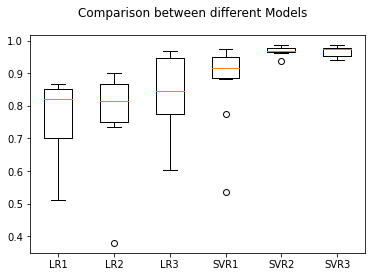

In [61]:
names = [] #Variable used to fetch names of the models in list of models
for name, model in models:
	names.append(name)

# boxplot of algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different Models')
ax = fig.add_subplot(111) # a graph of 1x1
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [62]:
#! pip install gradio #Library used to create UI 

In [63]:
import gradio as gr

In [64]:
def model_1(PH_121, HS_101, CY_105, HS_105_12, MT_111, CS_105, CS_106,
       EL_102, EE_119, ME_107, CS_107):
  #locals.values fetch the arguments passed in function, then converted to list then numpy array
  attributes = np.array(list(locals().values())).reshape(1,-1) 
  #array converted to dataframe in order to pre-process data fetched from user
  attributes = pd.DataFrame(attributes)
  #Assigning GPs to grades
  for i in range(0,11):
    attributes[i]=attributes[i].map(AssignGPs)
  #Multiplying GPs with credit hours
  four_cd=[0,5,6,8,9,10]
  three_cd=[2,3,4,7]
  two_cd=[1]
  for i in four_cd:
    attributes.iloc[:, i]=attributes.iloc[:, i]*4
  for i in three_cd:
    attributes.iloc[:, i]=attributes.iloc[:, i]*3
  for i in two_cd:
    attributes.iloc[:, i]=attributes.iloc[:, i]*2
  #data fetched from user are predicted using Support Vector Regressor model of First year
  predictions_model1 =  model_svr.predict(attributes)
  return predictions_model1

In [65]:
def model_2(PH_121, HS_101, CY_105, HS_105_12, MT_111, CS_105, CS_106,
       EL_102, EE_119, ME_107, CS_107, HS_205_20, MT_222, EE_222,
       MT_224, CS_210, CS_211, CS_203, CS_214, EE_217, CS_212,
       CS_215):
  #locals.values fetch the arguments passed in function, then converted to list then numpy array
  attributes = np.array(list(locals().values())).reshape(1,-1)
  #array converted to dataframe in order to pre-process data fetched from user
  attributes = pd.DataFrame(attributes)
  #Assigning GPs to grades
  for i in range(0,22):
    attributes[i]=attributes[i].map(AssignGPs)
  #Multiplying GPs with credit hours
  four_cd=[0,5,6,8,9,10,13,18,19,20,21]
  three_cd=[2,3,4,7,12,14,15,16]
  two_cd=[1,11]
  for i in four_cd:
    attributes.iloc[:, i]=attributes.iloc[:, i]*4
  for i in three_cd:
    attributes.iloc[:, i]=attributes.iloc[:, i]*3
  for i in two_cd:
    attributes.iloc[:, i]=attributes.iloc[:, i]*2
  #data fetched from user are predicted using Support Vector Regressor model of Second year
  predictions_model2 =  model_svr2.predict(attributes)
  return predictions_model2

In [66]:
def model_3(PH_121, HS_101, CY_105, HS_105_12, MT_111, CS_105, CS_106,
       EL_102, EE_119, ME_107, CS_107, HS_205_20, MT_222, EE_222,
       MT_224, CS_210, CS_211, CS_203, CS_214, EE_217, CS_212,
       CS_215, MT_331, EF_303, HS_304, CS_301, CS_302, TC_383, EL_332, CS_318, CS_306, CS_312, CS_317):
  #locals.values fetch the arguments passed in function, then converted to list then numpy array
  attributes = np.array(list(locals().values())).reshape(1,-1)
  #array converted to dataframe in order to pre-process data fetched from user
  attributes = pd.DataFrame(attributes)
  #Assigning GPs to grades
  for i in range(0,33):
    attributes[i]=attributes[i].map(AssignGPs)
  #Multiplying GPs with credit hours
  four_cd=[0,5,6,8,9,10,13,18,19,20,21,24,28,29,32]
  three_cd=[2,3,4,7,12,14,15,16,23,26,27,30]
  two_cd=[1,11,22,25,31]
  for i in four_cd:
    attributes.iloc[:, i]=attributes.iloc[:, i]*4
  for i in three_cd:
    attributes.iloc[:, i]=attributes.iloc[:, i]*3
  for i in two_cd:
    attributes.iloc[:, i]=attributes.iloc[:, i]*2
  #data fetched from user are predicted using Support Vector Regressor model of Third year
  predictions_model3 =  model_svr3.predict(attributes)
  return predictions_model3

In [67]:
demo = gr.Blocks()
with demo:
    gr.Markdown("Prediction of CGPA using Machine Learning Models.")
    with gr.Tabs():
        with gr.TabItem("One Year Model"):
          #UI for First year
          gr.Interface(fn=model_1,inputs=['text','text','text','text','text','text','text','text','text','text','text'],outputs='text')#11 courses data is taken from user in the form of grades
          #UI for Second year
        with gr.TabItem("Two Years Model"):
          gr.Interface(fn=model_2,inputs=['text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text'],outputs='text')#22 courses data is taken from user in the form of grades
          #UI for Third year
        with gr.TabItem("Three Years Model"):
          gr.Interface(fn=model_3,inputs=['text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text'],outputs='text')#33 courses data is taken from userin the form of grades

demo.launch()

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x7f04055512e0>, 'http://127.0.0.1:7860/', None)